# Predict Future Price

---

### Import Libraries and Dependencies

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

import talib

### Read CSV / API into Pandas DataFrame

In [2]:
# Loading data
file_path = Path("Resources/Yahoo Finance/All Yahoo Data.csv")
All_Yahoo_Data = pd.read_csv(file_path, index_col="Date")
All_Yahoo_Data.head()

df = All_Yahoo_Data.loc[All_Yahoo_Data['Ticker'] == 'GOOG']
df.head()

,High,Low,Open,Close,Volume,Adj Close,Ticker
Date,,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773,GOOG
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926,GOOG
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293,GOOG
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735,GOOG
2010-01-08,300.498657,293.455048,294.894653,299.885956,9484016.0,299.885956,GOOG


### Preparing Data

In [3]:
df = df.drop(["Adj Close", "Ticker"], axis=1)

stock_high = df['High']
stock_low = df['Low']
stock_open = df['Open']
stock_close = df['Close']
stock_volume = df['Volume']

### Calculate Daily Returns and Target Column

In [4]:
# Calculate daily return
df['Returns'] = df['Close'].pct_change()

# Create Target column
df['Target'] = np.where(df['Returns'] >= 0, 1.0, -1)

In [5]:
# MACD, MACD Histogram
df['MACD'], df['MSIG'], macdhist = talib.MACD(stock_close, fastperiod=12, slowperiod=26, signalperiod=9)
df.tail()

,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG
Date,,,,,,,,,
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,-0.003914,-1.0,14.802758,16.455812
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,0.012534,1.0,14.930346,16.150718
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,-0.006256,-1.0,14.181301,15.756835
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900.0,-0.011650,-1.0,12.176421,15.040752
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800.0,0.000659,1.0,10.537084,14.140018


In [6]:
# Compute Average Directional Index (ADX)
df['ADX'] = talib.ADX(stock_high, stock_low, stock_close, timeperiod=14)
df.tail()

,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX
Date,,,,,,,,,,
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,-0.003914,-1.0,14.802758,16.455812,32.184699
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,0.012534,1.0,14.930346,16.150718,32.763481
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,-0.006256,-1.0,14.181301,15.756835,33.457315
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900.0,-0.011650,-1.0,12.176421,15.040752,32.487466
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800.0,0.000659,1.0,10.537084,14.140018,31.139490


In [7]:
# Compute Relatie Strength Index (RSI)
df['RSI'] = talib.RSI(stock_close, timeperiod=14)
df.tail()

,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,RSI
Date,,,,,,,,,,,
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,-0.003914,-1.0,14.802758,16.455812,32.184699,58.411350
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,0.012534,1.0,14.930346,16.150718,32.763481,65.243314
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,-0.006256,-1.0,14.181301,15.756835,33.457315,59.889141
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900.0,-0.011650,-1.0,12.176421,15.040752,32.487466,51.470368
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800.0,0.000659,1.0,10.537084,14.140018,31.139490,51.877410


In [8]:
# Compute Bollinger Bands
df['BB Upper'], df['BB middle'], df['BB Lower'] = talib.BBANDS(stock_close, timeperiod=26)
df.tail()

,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,RSI,BB Upper,BB middle,BB Lower
Date,,,,,,,,,,,,,,
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,-0.003914,-1.0,14.802758,16.455812,32.184699,58.411350,1373.136326,1328.725389,1284.314452
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,0.012534,1.0,14.930346,16.150718,32.763481,65.243314,1376.159260,1330.252315,1284.345370
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,-0.006256,-1.0,14.181301,15.756835,33.457315,59.889141,1377.891553,1331.653471,1285.415388
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900.0,-0.011650,-1.0,12.176421,15.040752,32.487466,51.470368,1377.744773,1332.926162,1288.107550
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800.0,0.000659,1.0,10.537084,14.140018,31.139490,51.877410,1377.313949,1334.298086,1291.282223


In [9]:
# Compute Force Index
df['FI'] = df['Volume'] * (df['Close'] - df['Close'].shift(1))
df['EFI'] = talib.EMA(df['FI'], timeperiod=13)

# Remove Scientific Notation from columns FI and EFI
pd.options.display.float_format = '{:.2f}'.format

df.tail()

,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,RSI,BB Upper,BB middle,BB Lower,FI,EFI
Date,,,,,,,,,,,,,,,,
2019-12-24,1350.26,1342.78,1348.50,1343.56,347500.00,-0.00,-1.00,14.80,16.46,32.18,58.41,1373.14,1328.73,1284.31,-1834767.76,-796211.34
2019-12-26,1361.33,1344.47,1346.17,1360.40,667500.00,0.01,1.00,14.93,16.15,32.76,65.24,1376.16,1330.25,1284.35,11240677.19,923344.16
2019-12-27,1364.53,1349.31,1362.99,1351.89,1038400.00,-0.01,-1.00,14.18,15.76,33.46,59.89,1377.89,1331.65,1285.42,-8836794.14,-470961.31
2019-12-30,1353.00,1334.02,1350.00,1336.14,1050900.00,-0.01,-1.00,12.18,15.04,32.49,51.47,1377.74,1332.93,1288.11,-16551675.00,-2768206.12
2019-12-31,1338.00,1329.08,1330.11,1337.02,961800.00,0.00,1.00,10.54,14.14,31.14,51.88,1377.31,1334.30,1291.28,846388.70,-2251835.43


In [10]:
# ------------ SMA 50 AND 200 DAYS ------------

# Calculate 50 day simple movering average
df['SMA 50'] = df['Close'].transform(lambda x: x.rolling(window = 50).mean())

# Calculate 200 day simple movering average
df['SMA 200'] = df['Close'].transform(lambda x: x.rolling(window = 200).mean())

# Calculate simple moving average ratio to capture the relationship between the two moving averages
df['SMA 200/50'] = df['SMA 200'] / df['SMA 50']
df.tail()

,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,RSI,BB Upper,BB middle,BB Lower,FI,EFI,SMA 50,SMA 200,SMA 200/50
Date,,,,,,,,,,,,,,,,,,,
2019-12-24,1350.26,1342.78,1348.50,1343.56,347500.00,-0.00,-1.00,14.80,16.46,32.18,58.41,1373.14,1328.73,1284.31,-1834767.76,-796211.34,1303.84,1205.69,0.92
2019-12-26,1361.33,1344.47,1346.17,1360.40,667500.00,0.01,1.00,14.93,16.15,32.76,65.24,1376.16,1330.25,1284.35,11240677.19,923344.16,1306.18,1206.53,0.92
2019-12-27,1364.53,1349.31,1362.99,1351.89,1038400.00,-0.01,-1.00,14.18,15.76,33.46,59.89,1377.89,1331.65,1285.42,-8836794.14,-470961.31,1308.35,1207.36,0.92
2019-12-30,1353.00,1334.02,1350.00,1336.14,1050900.00,-0.01,-1.00,12.18,15.04,32.49,51.47,1377.74,1332.93,1288.11,-16551675.00,-2768206.12,1310.01,1208.12,0.92
2019-12-31,1338.00,1329.08,1330.11,1337.02,961800.00,0.00,1.00,10.54,14.14,31.14,51.88,1377.31,1334.30,1291.28,846388.70,-2251835.43,1311.84,1208.88,0.92


In [11]:
# ------------ SMA 5 AND 15 DAYS ------------

# Calculate 5 day simple movering average
df['SMA 5'] = df['Close'].transform(lambda x: x.rolling(window = 5).mean())

# Calculate 15 day simple movering average
df['SMA 15'] = df['Close'].transform(lambda x: x.rolling(window = 15).mean())

# Calculate simple moving average ratio to capture the relationship between the two moving averages
df['SMA 15/5'] = df['SMA 15'] / df['SMA 5']
df.tail()

,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,...,BB middle,BB Lower,FI,EFI,SMA 50,SMA 200,SMA 200/50,SMA 5,SMA 15,SMA 15/5
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,1350.26,1342.78,1348.50,1343.56,347500.00,-0.00,-1.00,14.80,16.46,32.18,...,1328.73,1284.31,-1834767.76,-796211.34,1303.84,1205.69,0.92,1350.13,1345.84,1.00
2019-12-26,1361.33,1344.47,1346.17,1360.40,667500.00,0.01,1.00,14.93,16.15,32.76,...,1330.25,1284.35,11240677.19,923344.16,1306.18,1206.53,0.92,1351.69,1348.50,1.00
2019-12-27,1364.53,1349.31,1362.99,1351.89,1038400.00,-0.01,-1.00,14.18,15.76,33.46,...,1331.65,1285.42,-8836794.14,-470961.31,1308.35,1207.36,0.92,1350.86,1350.08,1.00
2019-12-30,1353.00,1334.02,1350.00,1336.14,1050900.00,-0.01,-1.00,12.18,15.04,32.49,...,1332.93,1288.11,-16551675.00,-2768206.12,1310.01,1208.12,0.92,1348.17,1349.78,1.00
2019-12-31,1338.00,1329.08,1330.11,1337.02,961800.00,0.00,1.00,10.54,14.14,31.14,...,1334.30,1291.28,846388.70,-2251835.43,1311.84,1208.88,0.92,1345.80,1349.34,1.00


In [12]:
# Shift Target column by index 1
df['Target'] = df['Target'].shift(1)

# Replacing infinite with nan 
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
df.dropna(inplace=True) 
df.head()

,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,...,BB middle,BB Lower,FI,EFI,SMA 50,SMA 200,SMA 200/50,SMA 5,SMA 15,SMA 15/5
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-18,308.69,299.15,299.15,307.70,14249612.00,0.03,1.00,11.50,8.23,36.89,...,261.99,230.80,115416725.81,129727081.75,249.12,258.52,1.04,283.42,270.69,0.96
2010-10-19,306.26,300.30,303.29,302.78,9210193.00,-0.02,1.00,12.75,9.13,39.19,...,264.40,230.74,-45328326.87,104719166.23,250.14,258.47,1.03,290.03,273.37,0.94
2010-10-20,307.54,302.62,302.93,302.85,7076626.00,0.00,-1.00,13.59,10.03,41.38,...,266.84,231.63,528673.72,89834810.16,251.18,258.43,1.03,296.48,276.04,0.93
2010-10-21,306.85,301.87,304.61,304.85,5862894.00,0.01,1.00,14.26,10.87,43.23,...,269.36,233.01,11711116.45,78674282.49,252.38,258.44,1.02,303.56,278.90,0.92
2010-10-22,306.26,303.89,304.82,305.12,4529113.00,0.00,1.00,14.63,11.62,44.96,...,271.88,235.04,1218387.79,67609154.67,253.58,258.49,1.02,304.66,281.79,0.92


### Split Train and Test Data Sets

In [13]:
# Define features set
X = df.copy()
X.drop(['Returns', 'Target'], axis=1, inplace=True)
X.head()

,High,Low,Open,Close,Volume,MACD,MSIG,ADX,RSI,BB Upper,BB middle,BB Lower,FI,EFI,SMA 50,SMA 200,SMA 200/50,SMA 5,SMA 15,SMA 15/5
Date,,,,,,,,,,,,,,,,,,,,
2010-10-18,308.69,299.15,299.15,307.70,14249612.00,11.50,8.23,36.89,86.84,293.18,261.99,230.80,115416725.81,129727081.75,249.12,258.52,1.04,283.42,270.69,0.96
2010-10-19,306.26,300.30,303.29,302.78,9210193.00,12.75,9.13,39.19,80.13,298.06,264.40,230.74,-45328326.87,104719166.23,250.14,258.47,1.03,290.03,273.37,0.94
2010-10-20,307.54,302.62,302.93,302.85,7076626.00,13.59,10.03,41.38,80.16,302.05,266.84,231.63,528673.72,89834810.16,251.18,258.43,1.03,296.48,276.04,0.93
2010-10-21,306.85,301.87,304.61,304.85,5862894.00,14.26,10.87,43.23,80.85,305.71,269.36,233.01,11711116.45,78674282.49,252.38,258.44,1.02,303.56,278.90,0.92
2010-10-22,306.26,303.89,304.82,305.12,4529113.00,14.63,11.62,44.96,80.95,308.71,271.88,235.04,1218387.79,67609154.67,253.58,258.49,1.02,304.66,281.79,0.92


In [14]:
# Define target vector
y = df["Target"].ravel()
y[:5]

array([ 1.,  1., -1.,  1.,  1.])

In [15]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

### Scale Data

In [16]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [17]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [18]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Create Model and Make Pedictions

In [19]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [20]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [21]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

### Model Evaluation

In [22]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [23]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,203,138
Actual 1,128,227


Accuracy Score : 0.617816091954023
Classification Report
              precision    recall  f1-score   support

        -1.0       0.61      0.60      0.60       341
         1.0       0.62      0.64      0.63       355

    accuracy                           0.62       696
   macro avg       0.62      0.62      0.62       696
weighted avg       0.62      0.62      0.62       696



## Feature Importance

In [24]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [25]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10142843969236018, 'RSI'),
 (0.09304066718976221, 'EFI'),
 (0.07437528777909816, 'SMA 15/5'),
 (0.07393406965780154, 'FI'),
 (0.06285817693963952, 'MSIG'),
 (0.06270968987678589, 'MACD'),
 (0.057263396003397825, 'Volume'),
 (0.05520689032145452, 'ADX'),
 (0.04733635277953464, 'SMA 200/50'),
 (0.03610932974799259, 'SMA 200'),
 (0.035670866657331664, 'Open'),
 (0.03538431085176203, 'BB Lower'),
 (0.0344654888158853, 'Low'),
 (0.033958320187551516, 'High'),
 (0.033919226361213084, 'SMA 5'),
 (0.033446836962005455, 'SMA 15'),
 (0.033211725633721115, 'BB Upper'),
 (0.03275902981949642, 'Close'),
 (0.03192235378262113, 'SMA 50'),
 (0.03099954094058531, 'BB middle')]

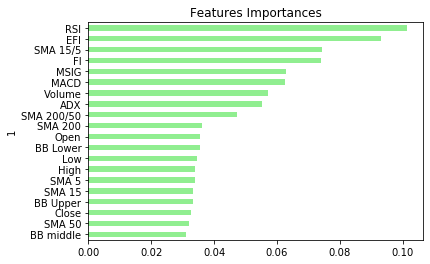

In [26]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Evaluate & Plot